In [1]:
#Importing packages
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### LOADING THE PRICE DATA

In [2]:
#Defining the stock --> MSFT = Microsoft
msft = yf.Ticker("MSFT")

In [3]:
#Stock information
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [4]:
#Importing the historic price action
hist = msft.history(period="max")

In [5]:
#Visualising the data
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434,1031788800,0.0,0.0
1986-03-14,0.061434,0.064725,0.061434,0.063628,308160000,0.0,0.0
1986-03-17,0.063628,0.065274,0.063628,0.064725,133171200,0.0,0.0
1986-03-18,0.064725,0.065274,0.062531,0.063079,67766400,0.0,0.0
1986-03-19,0.063079,0.063628,0.061434,0.061982,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998,33422100,0.0,0.0
2022-04-01,309.369995,310.130005,305.540009,309.420013,27085100,0.0,0.0
2022-04-04,310.089996,315.109985,309.709991,314.970001,24289600,0.0,0.0


In [6]:
#Formatting and slicing the data to contain OHLC and Volume (I don´t include today´s data)
data = np.array(hist, dtype = float)
data = data[:-1,:5]

Text(0, 0.5, 'Price ($)')

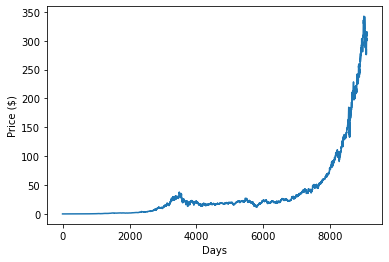

In [7]:
#Plotting the historical close prices
plt.plot(data[:,3])
plt.xlabel("Days")
plt.ylabel("Price ($)")

---

### DEFINING THE INDICATORS

In [8]:
#Moving Average function (MA)

def MA(dataset, timeframe_MA):

    Moving_Average = np.zeros(len(dataset))
    Moving_Average[:timeframe_MA-1] = "NaN"
    
    for i in range(timeframe_MA-1, len(dataset)): 
        Moving_Average[i] = np.mean(dataset[i-timeframe_MA+1:i+1])
        
    return Moving_Average

In [9]:
#Exponential Moving Average function (EMA)

def EMA(dataset, MA, timeframe_EMA):

    Exponential_Moving_Average = np.zeros(len(dataset))
    Exponential_Moving_Average[:timeframe_EMA-1] = "NaN"
    Exponential_Moving_Average[timeframe_EMA-1] = MA[timeframe_EMA-1]
    
    multiplier = 2/(timeframe_EMA+1)
    
    for i in range(timeframe_EMA, len(dataset)):
        Exponential_Moving_Average[i] = (dataset[i] * multiplier) + (Exponential_Moving_Average[i-1] * (1-multiplier))
        
    return Exponential_Moving_Average

In [10]:
#Relative Strength Index function (RSI)

def RSI(dataset, timeframe_RSI):
    
    RSI = np.zeros(len(dataset))
    RSI[:timeframe_RSI] = "NaN"
    
    #for i in timeframe_RSI:
        
    gain = np.zeros(timeframe_RSI)
    loss = np.zeros(timeframe_RSI)
        
    for j in range(1, timeframe_RSI+1):
            
        if dataset[j] > dataset[j-1]:
            gain[j-1] = dataset[j] - dataset[j-1]
        elif dataset[j] < dataset[j-1]:
            loss[j-1] = dataset[j-1] - dataset[j]
            
    avg_gain = sum(gain) / timeframe_RSI
    avg_loss = sum(loss) / timeframe_RSI
    RS = avg_gain / avg_loss
    RSI[timeframe_RSI] = 100 - (100/(1+RS))
    
    for i in range(timeframe_RSI+1, len(dataset)):
        
        if dataset[i] > dataset[i-1]:
            
            avg_gain = (avg_gain*(timeframe_RSI-1)+(dataset[i] - dataset[i-1])) / timeframe_RSI
            avg_loss = (avg_loss*(timeframe_RSI-1)) / timeframe_RSI
            RS = avg_gain / avg_loss
            RSI[i] = 100 - (100/(1+RS))
            
        elif dataset[i] < dataset[i-1]:
            
            avg_gain = (avg_gain*(timeframe_RSI-1)) / timeframe_RSI
            avg_loss = (avg_loss*(timeframe_RSI-1)+(dataset[i-1] - dataset[i])) / timeframe_RSI
            RS = avg_gain / avg_loss
            RSI[i] = 100 - (100/(1+RS))
        
        else:
            
            avg_gain = (avg_gain*(timeframe_RSI-1)) / timeframe_RSI
            avg_loss = (avg_loss*(timeframe_RSI-1)) / timeframe_RSI
            RS = avg_gain / avg_loss
            RSI[i] = 100 - (100/(1+RS))
    
    return RSI

---

### USING THE INDICATOR FUNCTIONS

In [11]:
#Defining the closing prices
close_price = data[:,3]

In [12]:
#Using the indicators functions

MA50 = MA(close_price, 50)              # 50-day Moving Average
EMA50 = EMA(close_price, MA50, 50)      # 50-day Exponential Moving Average

MA200 = MA(close_price, 200)            # 200-day Moving Average
EMA200 = EMA(close_price, MA50, 200)    # 200-day Exponential Moving Average

RSI14 = RSI(close_price, 14)            # RSI

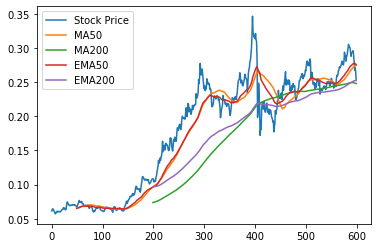

In [13]:
plt.plot(close_price[:600], label="Stock Price")

plt.plot(MA50[:600], label="MA50")
plt.plot(MA200[:600], label="MA200")

plt.plot(EMA50[:600], label="EMA50")
plt.plot(EMA200[:600], label="EMA200")

plt.legend()

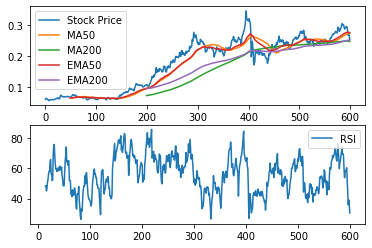

In [14]:
plt.subplot(2,1,1)

plt.plot(close_price[:600], label="Stock Price")

plt.plot(MA50[:600], label="MA50")
plt.plot(MA200[:600], label="MA200")

plt.plot(EMA50[:600], label="EMA50")
plt.plot(EMA200[:600], label="EMA200")

plt.legend()


plt.subplot(2,1,2)

plt.plot(RSI14[:600], label="RSI")

plt.legend()

---

### CREATING THE OUTPUT FILE

In [15]:
#Creating the final dataset
Data_Stock = hist.drop(columns=['Dividends', 'Stock Splits'])
Data_Stock

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434,1031788800
1986-03-14,0.061434,0.064725,0.061434,0.063628,308160000
1986-03-17,0.063628,0.065274,0.063628,0.064725,133171200
1986-03-18,0.064725,0.065274,0.062531,0.063079,67766400
1986-03-19,0.063079,0.063628,0.061434,0.061982,47894400
...,...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998,33422100
2022-04-01,309.369995,310.130005,305.540009,309.420013,27085100
2022-04-04,310.089996,315.109985,309.709991,314.970001,24289600


In [16]:
#Including the calculated indicators
MA50 = np.append(MA50, "Nan")
Data_Stock["MA 50"] = MA50

EMA50 = np.append(EMA50, "Nan")
Data_Stock["EMA 50"] = EMA50

MA200 = np.append(MA200, "Nan")
Data_Stock["MA 200"] = MA200

EMA200 = np.append(EMA200, "Nan")
Data_Stock["EMA 200"] = EMA200

RSI14 = np.append(RSI14, "Nan")
Data_Stock["RSI 14"] = RSI14

Data_Stock

,Open,High,Low,Close,Volume,MA 50,EMA 50,MA 200,EMA 200,RSI 14
Date,,,,,,,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434,1031788800,nan,nan,nan,nan,nan
1986-03-14,0.061434,0.064725,0.061434,0.063628,308160000,nan,nan,nan,nan,nan
1986-03-17,0.063628,0.065274,0.063628,0.064725,133171200,nan,nan,nan,nan,nan
1986-03-18,0.064725,0.065274,0.062531,0.063079,67766400,nan,nan,nan,nan,nan
1986-03-19,0.063079,0.063628,0.061434,0.061982,47894400,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998,33422100,297.2908282470703,301.11286564316475,302.46351654052734,294.868096930513,56.799584535969196
2022-04-01,309.369995,310.130005,305.540009,309.420013,27085100,297.45967529296877,301.43863614452044,302.7136686706543,295.0128921195401,57.56554861040265
2022-04-04,310.089996,315.109985,309.709991,314.970001,24289600,297.8506921386719,301.9692779122139,302.9988780212402,295.21147031955167,61.263711276226736


---

### SAVING AND LOADING CSV FILES

In [17]:
#Data_Stock.to_csv(r'Test_Output.csv')

In [18]:
#test_input = pd.read_csv('Test_Output.csv')